# Predicting Newsletter Subscription: Analyzing Player Age and Gameplay Hours

## 1. Introduction 

### 1.1 Background Information 

<p>In the gaming industry newsletters are important for keeping players up to date with new information. These letters help maintain engagement by reaching players outside of the game itself. However, not all players subscribe, and understanding what factors contribute to that can be valuable for improving engagement. <p>
    
</p>Player characteristics such as age and how many hours a person plays often influence their level of involvement in a game. Players who spend more time in a game might be more invested and therefore more likely to want updates. Age can also affect communication preferences and level of interest. By studying these factors, game companies can better understand what motivates players to stay connected and how game companies can target different groups of people. <p>



### 1.2 Big Question

What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

### 1.3 Dataset Description 

<p>The dataset used for this project is a course provided dataset for the purpose of practicing data analysis. It contains 196 rows and 7 columns. Each row represents a single player and each column represents a different variables. <p> </p> For this project, the analysis focused on the following key variables: 
-Age : A numerical value indicating how old each player is 
-Played_hours: A numerical value showing the total number of hours played in game 
-Subscribe: A binary variable indicating whether the player subscribed to the newsletter (TRUE or FALSE).<p> </p>


## 2. Methods

## 2.1 Load in Libraries and Set Seed

In order to run our analysis, we load in the Tidyverse and Tidymodels libraries. To make our analysis reproducible, we set the seed to a specific number. We use the set.seed function to do this. 

In [3]:
# load libraries
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [4]:
# set seed
set.seed(4321)

### 2.2 Load the Data

We load in the players.csv file for our analysis, storing the resulting dataframe as a variable. We print the first few rows of it. 

In [20]:
players <- read_csv("https://raw.githubusercontent.com/Jchox2/Project-008-24-DSCI/refs/heads/main/players.csv")
# head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


|experience|subscribe|hashedEmail|played_hours|name|gender|Age|
|---|---|---|---|---|---|---|
|Pro |TRUE	|f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d	|30.3	|Morgan 	|Male 	|9|
|Veteran	|TRUE	|f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9	|3.8	|Christian	|Male 	|17|
|Veteran	|FALSE	|b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28	|0.0	|Blake 	|Male 	|17|
|Amateur	|TRUE	|23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5	|0.7	|Flora 	|Female	|21|
|Regular	|TRUE	|7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e	|0.1	|Kylie 	|Male 	|21|
|Amateur	|TRUE	|f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977	|0.0	|Adrian 	|Female	|17|

*Figure 1: The first 6 Rows of `players.csv`*

### 2.3 Wrangle and Clean the Data

To ensure our classification model runs error-free, the `experience` column is changed to a `factor` dataype.

In [7]:
players <- mutate(players, experience = as_factor(experience))

### 2.4 Summary Statistics

We use the `summarize` function to output:
- the **mean** of the `Age` and `played_hours` columns, ignoring NA values, denoted by the `Avg_age` and `Avg_played_hours` columns;
- the **max/min** of the `Age` and `played_hours` columns, ignoring NA values, denoted by the `Max/Min_age` and `Max/Min_played_hours` columns;
- the **count** of "TRUE" and "FALSE" in the `subscribe` column, denoted by the `cnt_subscribe` column;
- and the **count** of each type of player in the `experience` column, denoted by the `cnt_experience` column.

In [18]:
averages <- summarize(players, 
                     Avg_age = mean(Age, na.rm = TRUE),
                     Avg_played_hours = mean(played_hours, na.rm = TRUE), 
                    )

extreme_vals <- summarize(players, 
                    Max_age = max(Age, na.rm = TRUE),
                     Min_age = min(Age, na.rm = TRUE),
                     Max_played_hours = max(played_hours, na.rm = TRUE),
                     Min_played_hours = min(played_hours, na.rm = TRUE),
                          )

cnt_subscribe <- players |>
    group_by(subscribe) |>
    summarize(count_subscribe = n())

cnt_experience <- players |>
    group_by(experience) |>
    summarize(count_experience = n())

averages
extreme_vals
cnt_subscribe
cnt_experience

Avg_age,Avg_played_hours
<dbl>,<dbl>
21.13918,5.845918


Max_age,Min_age,Max_played_hours,Min_played_hours
<dbl>,<dbl>,<dbl>,<dbl>
58,9,223.1,0


subscribe,count_subscribe
<lgl>,<int>
FALSE,52
TRUE,144


experience,count_experience
<fct>,<int>
Pro,14
Veteran,48
Amateur,63
Regular,36
Beginner,35


### 2.5 Exploratory Visualization to Answer the Second Portion of the Main Question

4 plots were made. The first and second plots were scatter plots of `Age` vs. `played_hours`, with the second plot having data points within 0 to 8 hours played. The third and fourth plots similarly follow this same pattern, except they are `facet_grids` containing a scatter plot for each type of player. 

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 15 rows containing missing values or values outside the scale range
(`geom_point()`).”


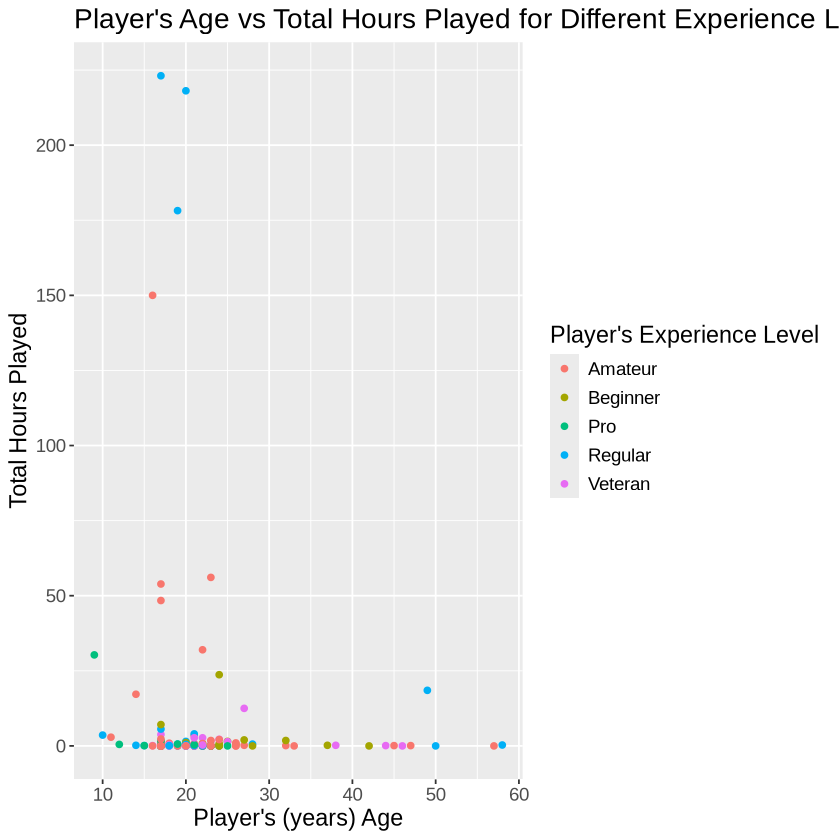

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


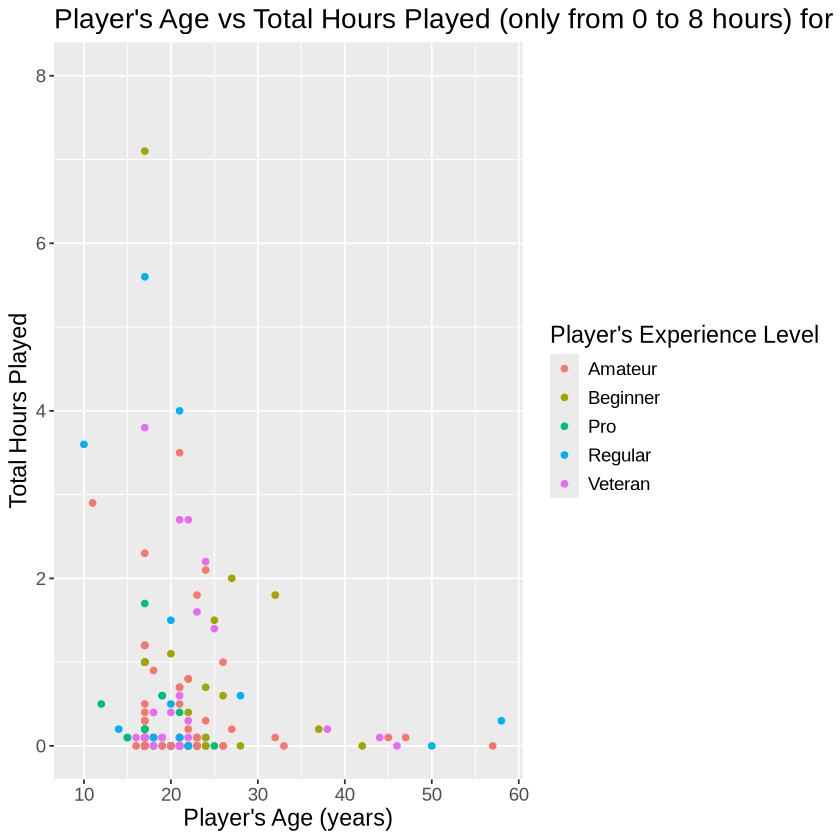

Warning message:
“Removed 15 rows containing missing values or values outside the scale range
(`geom_point()`).”


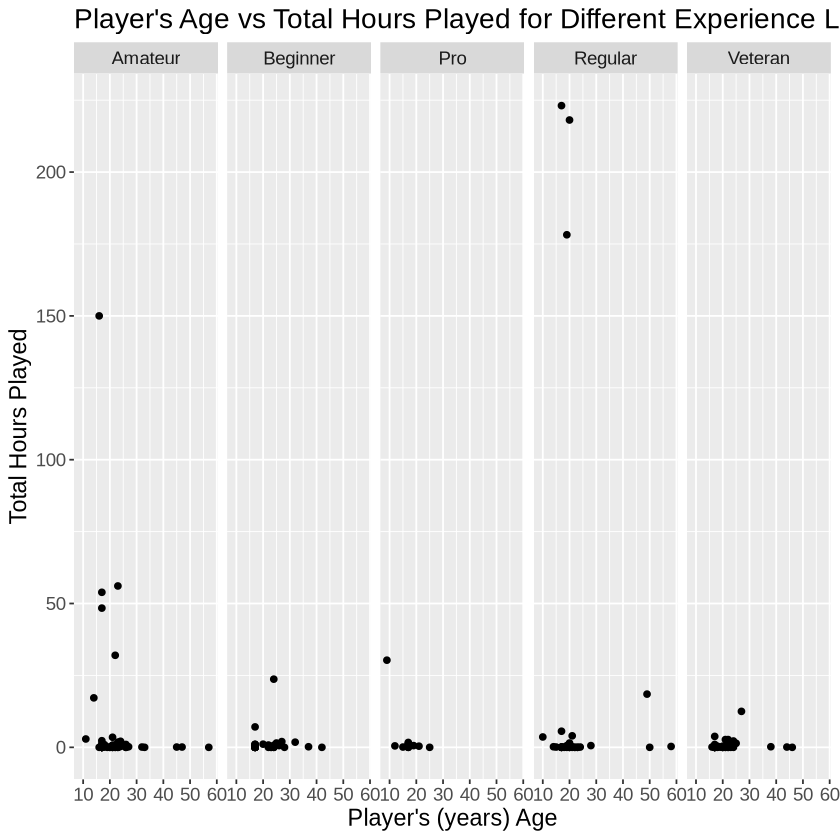

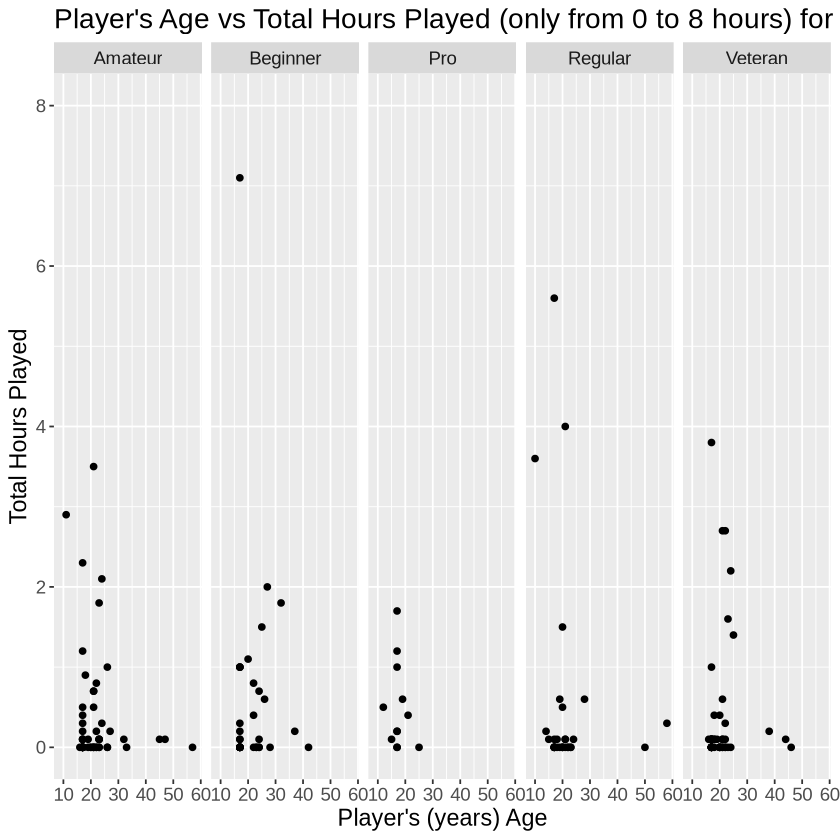

In [21]:
plot1 <- ggplot(players, aes(x = Age, y = played_hours, color = experience)) + 
    geom_point() + 
    theme(text = element_text(size = 14))

plot2 <- plot1 + 
    labs(x = "Player's Age (years)", y = "Total Hours Played", 
         title = "Player's Age vs Total Hours Played (only from 0 to 8 hours) for Different Experience Levels", 
        color = "Player's Experience Level") + 
    ylim(c(0, 8))

plot3 <- ggplot(players, aes(x = Age, y = played_hours)) + 
    geom_point() + 
    facet_grid(cols = vars(experience)) + 
    theme(text = element_text(size = 14))

plot4 <- plot3 + 
    labs(x = "Player's (years) Age", y = "Total Hours Played", 
         title = "Player's Age vs Total Hours Played (only from 0 to 8 hours) for Different Experience Levels") +
    ylim(c(0, 8))
plot1 + labs(x = "Player's (years) Age", y = "Total Hours Played", 
         title = "Player's Age vs Total Hours Played for Different Experience Levels", 
        color = "Player's Experience Level")
plot2
plot3 + labs(x = "Player's (years) Age", y = "Total Hours Played", 
         title = "Player's Age vs Total Hours Played for Different Experience Levels")
plot4

## 3. Results

### 3.1 Differences Among Player Types

All plots in Figure 2 did not show any clear trend between the types of players. The first plot showed a slight inverse relationship at the top, and a cluster of points near the bottom, showing that a large portion of players played very few hours, with some outliers. The second plot, limiting the y-axis, more clearly shows the inverse relationship in the bottom cluster. The third and fourth plots similarly showed an inverse relationship, with a tendency to cluster a majority of points near the bottom left. 